# Decision Tree
# ****************

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('sample1.csv')

In [5]:
df

,Day,Outlook,Temperature,Humidity,Wind,Play Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


### Play Tennis is outlook

In [6]:
df['Play Tennis'].value_counts()

Play Tennis
Yes    9
No     5
Name: count, dtype: int64

In [47]:
df.loc[(df['Play Tennis']=='Yes') & (df['Humidity']=='Normal')]

,Day,Outlook,Temperature,Humidity,Wind,Play Tennis
4,D5,Rain,Cool,Normal,Weak,Yes
6,D7,Overcast,Cool,Normal,Strong,Yes
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes


### Entropy
### *********
#### Measures the purity of split
#### formula $H(S)=-P_+log_2(P_{+})-P_{-}log_2(P_{-})$
#### Where $P_+$= Probability of Yes in Tree and $P_-$=Probability of NO

### Information Gain
### *******************
#### Gain$(s,f_1)=H(s)-\sum\limits_{V\in val} \frac{{|S_v|}}{|S|}H(S_\hat{v})$
#### where $H(S_\hat{v})$ is the entropy of that particular node
#### where $s_v$ is how many samples in the particular node
#### where $s$ is the total samples in root node
#### This value will be in the range 0-1

### GINI Impurity
### ***************
#### G.I $= 1-\sum\limits_{i=1}^{n}(P^{2})$
#### n is number of outputs
#### is n={Yes,No}, n=2
#### G.I$=1-[(P_+)^2+(P_-)^2]$
#### This value will be in the range 0-0.5

#### Here G.I and Entropy are the cost functions in Decision Tree Classfication Problems

#### When to use G.I ?,when to use Entropy?
#### Since Entropy have log functions, implies more amount of time to compute is taken by entropy
#### If we have large sets we can use G.I since it is simple math compared to entropy

#### ******************************************************************************************

### Decision Tree Regressor
### ****************************


#### In Decision Tree regressor the output variable is continous and here insted of entropy we check the the cost function is MSE or MAE. We split according to MSE and when we get our MSE value lower, then we are apporaching to leaf node

### The Hyper Parameters in Decision Tree
### *********************************************
#### 1.Post Pruning: we created a desicion tree and a particular node has 7yes\2 no, from this we can say that almost 80 percent chance this node is saying output is yes so we can cut this particular branch.
#### 2.Pre Pruning: It is used by hyper-paramters like max-depth, max-lef we can set this using "Gridscan hCV"

### *****************************************************************************

### Importing Required Libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
from sklearn.datasets import load_iris

In [51]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [52]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
from sklearn import tree

In [55]:
decision=DecisionTreeClassifier()

In [59]:
decision.fit(iris.data,iris.target)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

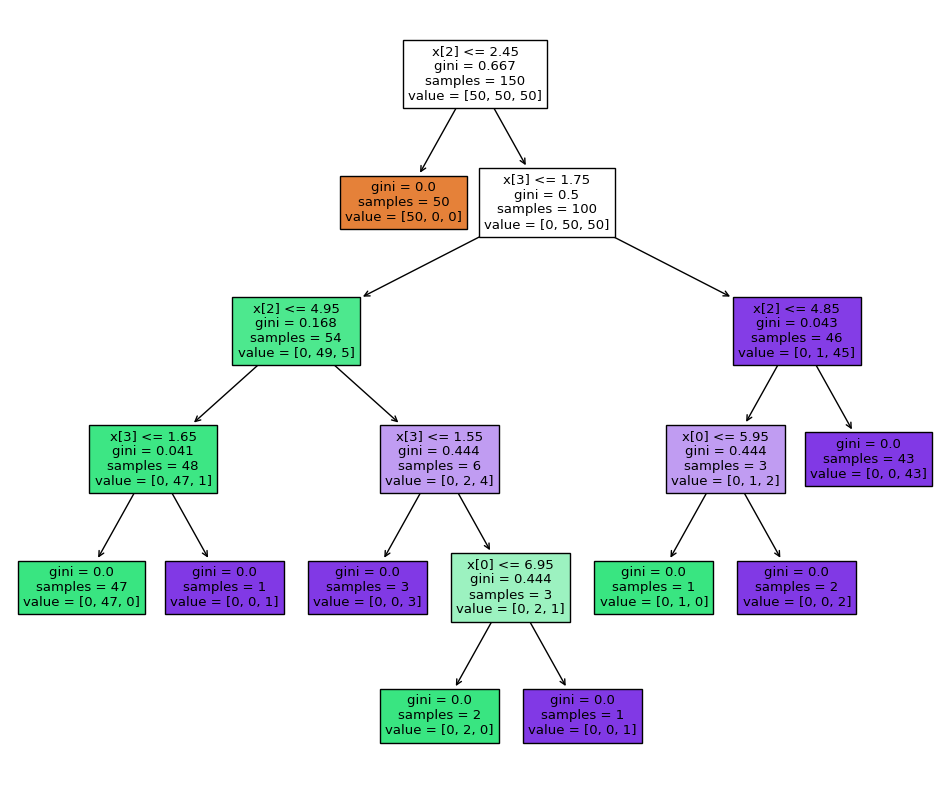

In [60]:
plt.figure(figsize=(12,10))
tree.plot_tree(decision,filled=True)